In [14]:
%run -i ch04.py

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression

from jupyterthemes import jtplot
jtplot.style(theme='gruvboxd')

from models import RegressionModel

In [16]:
theta = [4, 3]
count = 100
X, y = generate_data(theta, count)

In [17]:
y[:10]

array([[6.8194],
       [8.2755],
       [11.8562],
       [6.4017],
       [4.7538],
       [5.0766],
       [3.3130],
       [5.5948],
       [7.8612],
       [9.0234]])

In [18]:
X[:10]

array([[0.7244],
       [1.7805],
       [1.9034],
       [0.7788],
       [0.6007],
       [0.5759],
       [0.1633],
       [0.2711],
       [0.9326],
       [1.8298]])

In [19]:
theta = linear_fit(X, y)
theta

array([[3.8739],
       [3.0766]])

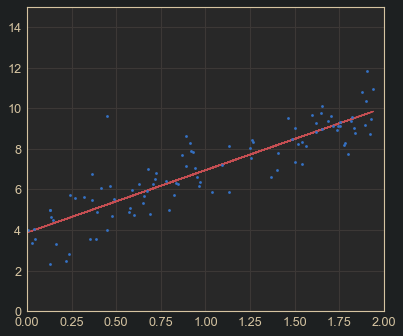

In [20]:
y_ = linear_predict(X, theta)
plt.plot(X, y_, 'r-')
plt.plot(X, y, 'b.')
plt.axis([0, 2, 0, 15])
plt.show()

In [ ]:
lr = new RegressionModel(LinearRegression)
